In [30]:
import numpy as np
%config InlineBackend.rc = {}
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as Color
%matplotlib inline
from astropy.utils.data import download_file
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits
from matplotlib.colors import LogNorm
from photutils import CircularAperture
from astropy import units as u
from photutils import aperture_photometry
from photutils import CircularAnnulus
from photutils import EllipticalAnnulus
from math import sin, cos, pi
from photutils import EllipticalAperture
import pandas as pd
#import atpy
#import aplpy
#import montage_wrapper
from math import log10
from reproject import reproject_exact
from reproject import reproject_interp
from astropy.wcs import WCS

In [31]:
ha=[218.04144287109375, 259.80804443359375, 262.6343994140625, 353.4979248046875, 334.75836181640625, 449.00091552734375, 433.03515625, 360.9639892578125, 311.5328369140625, 348.78726196289062, 225.69247436523438, 599.650634765625, 210.38079833984375, 275.83004760742188, 242.18338012695312, 539.87493896484375, 569.0322265625]
hb=[345.81878662109375, 413.73822021484375, 279.77822875976562, 345.84246826171875, 441.0150146484375, 324.39459228515625, 426.16131591796875, 305.40704345703125, 380.04351806640625, 320.40142822265625, 320.40142822265625, 320.40142822265625, 301.42910766601562, 305.40704345703125, 509.02749633789062, 551.00189208984375, 655.4686279296875]
ja=[62.332622528076172, 64.535835266113281, 73.985618591308594, 79.26318359375, 80.307815551757812, 105.89296722412109, 108.75251770019531, 97.89031982421875, 98.050102233886719, 81.281898498535156, 71.474700927734375, 139.73513793945312, 73.71405029296875, 69.125045776367188, 48.920486450195312, 146.09689331054688, 124.70478820800781]
jb=[93.925262451171875, 96.367050170898438, 94.890739440917969, 93.934661865234375, 104.5501708984375, 85.740936279296875, 108.50182342529297, 79.521903991699219, 111.43914031982422, 85.119308471679688, 85.119308471679688, 85.119308471679688, 88.285926818847656, 79.521903991699219, 142.30546569824219, 139.438232421875, 185.66873168945312]
ka=[319.2728271484375, 463.90597534179688, 409.29971313476562, 549.9947509765625, 450.27606201171875, 581.7249755859375, 486.1875, 553.9576416015625, 596.833984375, 455.35537719726562, 550.64068603515625, 717.35833740234375, 656.04815673828125, 463.125732421875, 604.2669677734375, 523.74383544921875, 477.25039672851562]
kb=[582.6527099609375, 507.33868408203125, 558.55841064453125, 582.54254150390625, 409.28469848632812, 535.25579833984375, 615.3924560546875, 449.35952758789062, 612.8226318359375, 445.69146728515625, 445.69146728515625, 445.69146728515625, 593.2659912109375, 449.35952758789062, 201.16671752929688, 633.523193359375, 654.7982177734375]
W1a=[3.2276818752288818, 3.2217628955841064, 3.1311790943145752, 3.1538503170013428, 3.6713321208953857, 3.5083217620849609, 3.3754415512084961, 3.3620896339416504, 4.1817855834960938, 3.6875786781311035, 3.7410259246826172, 3.7154932022094727, 3.6066925525665283, 3.4381580352783203, 3.328648567199707, 3.958179235458374, 3.8706021308898926]
W1b=[5.1341943740844727, 4.0127944946289062, 3.1075198650360107, 5.1341943740844727, 3.6306068897247314, 5.0866751670837402, 4.1486940383911133, 4.3912076950073242, 3.7938542366027832, 4.298098087310791, 4.298098087310791, 4.298098087310791, 5.4326872825622559, 4.3912076950073242, 4.0481114387512207, 3.608574390411377, 4.0529508590698242]
W2a=[9.0324764251708984, 8.8616476058959961, 8.4389200210571289, 8.5037164688110352, 9.090327262878418, 9.0773983001708984, 8.9977045059204102, 8.9517936706542969, 11.165695190429688, 10.568161010742188, 10.579358100891113, 10.372851371765137, 10.307441711425781, 9.3012323379516602, 7.6283426284790039, 10.837638854980469, 9.9914426803588867]
W2b=[25.258846282958984, 10.792315483093262, 8.5013017654418945, 25.258846282958984, 9.3369197845458984, 18.767440795898438, 10.883947372436523, 11.108842849731445, 9.5581092834472656, 10.594289779663086, 10.594289779663086, 10.594289779663086, 22.898746490478516, 11.108842849731445, 9.6738719940185547, 10.168113708496094, 10.234711647033691]
W3a=[609.72979736328125, 575.4630126953125, 505.32489013671875, 492.0062255859375, 557.35894775390625, 572.54296875, 559.05145263671875, 559.2679443359375, 723.82794189453125, 609.158935546875, 630.8458251953125, 587.92449951171875, 587.1337890625, 614.3294677734375, 421.8621826171875, 652.0499267578125, 667.6094970703125]
W3b=[684.51422119140625, 744.1015625, 505.17779541015625, 684.51422119140625, 578.97869873046875, 868.9547119140625, 770.0692138671875, 836.93267822265625, 666.5052490234375, 806.2418212890625, 806.2418212890625, 806.2418212890625, 789.42529296875, 836.93267822265625, 698.02691650390625, 573.14886474609375, 702.778564453125]
W4a=[189.90231323242188, 178.36126708984375, 152.468017578125, 147.83193969726562, 170.98651123046875, 180.23568725585938, 175.48106384277344, 175.47647094726562, 245.232177734375, 196.17056274414062, 203.96041870117188, 189.6197509765625, 189.54409790039062, 186.90609741210938, 120.82234954833984, 205.68801879882812, 214.12844848632812]
W4b=[206.8494873046875, 243.30120849609375, 152.03677368164062, 206.8494873046875, 177.88417053222656, 287.63034057617188, 257.77471923828125, 282.58279418945312, 219.86119079589844, 270.23516845703125, 270.23516845703125, 270.23516845703125, 268.11907958984375, 282.58279418945312, 234.51544189453125, 183.52838134765625, 223.46783447265625]
SDSSb_u=[0, 0, 0, 0, 0, 0, 0, 0, 0, 1021.0, 1021.0, 1021.0, 0, 0, 0, 0, 0] 
SDSSb_g=[0, 0, 0, 0, 0, 0, 0, 0, 0, 1090.0, 1090.0, 1090.0, 0, 0, 0, 0, 0] 
SDSSb_r=[0, 0, 0, 0, 0, 0, 0, 0, 0, 1226.5, 1226.5, 1226.5, 0, 0, 0, 0, 0]
SDSSb_i=[0, 0, 0, 0, 0, 0, 0, 0, 0, 1298.5, 1298.5, 1298.5, 0, 0, 0, 0, 0] 
SDSSb_z=[0, 0, 0, 0, 0, 0, 0, 0, 0, 1182.5, 1182.5, 1182.5, 0, 0, 0, 0, 0] 
SDSSa_u=[0, 0, 0, 0, 0, 0, 0, 0, 0, 1032.0, 1028.0, 1028.0, 0, 0, 0, 0, 0] 
SDSSa_g=[0, 0, 0, 0, 0, 0, 0, 0, 0, 1096.5, 1076.0, 1083.0, 0, 0, 0, 0, 0] 
SDSSa_r=[0, 0, 0, 0, 0, 0, 0, 0, 0, 1182.0, 1136.0, 1180.5, 0, 0, 0, 0, 0] 
SDSSa_i=[0, 0, 0, 0, 0, 0, 0, 0, 0, 1225.0, 1168.0, 1296.5, 0, 0, 0, 0, 0] 
SDSSa_z=[0, 0, 0, 0, 0, 0, 0, 0, 0, 1124.5, 1087.5, 1173.5, 0, 0, 0, 0, 0] 

In [32]:
#i = 10
#band=1
letter = 'a'
arrmgePic = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
image_file = [1, 2, 3]#, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
image_data = [1, 2, 3]#, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
flat_image = [1, 2, 3]#, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
flat_image2 = [1, 2, 3, 4]#, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
testarray = [1, 2, 3]#, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
short_array = [1, 2, 3, 4, 5]
image_file1 = [1, 2, 3, 4, 5]
image_data1 = [1, 2, 3, 4, 5]
testarray1 = [1, 2, 3, 4, 5]
testarray2 = [1, 2, 3, 4]
image_file2 = [1, 2, 3, 4]
image_data2 = [1, 2, 3, 4]
newtestarray2MASS = [1, 2, 3]
newtestarraySDSS = [1, 2, 3, 4, 5]
newtestarrayWISE = [1, 2, 3, 4]
Length_Range_WISE = [1 ,2]
Length_Range_SDSS = [1, 2]
Length_Range_2MASS = [1, 2]
parsing_headerWISE = [1, 2, 3, 4]
hduinfoWISE = [1, 2, 3, 4]
wcsWISE1 = [1, 2, 3, 4]
hdudataWISE = [1, 2, 3, 4]
parsing_headerSDSS = [1, 2, 3, 4, 5]
hduinfoSDSS = [1, 2, 3, 4, 5]
wcsSDSS1 = [1, 2, 3, 4, 5]
hdudataSDSS = [1, 2, 3, 4, 5]
parsing_header2MASS = [1, 2, 3]
hduinfo2MASS = [1, 2, 3]
wcs2MASS1 = [1, 2, 3]
hdudata2MASS = [1, 2, 3]
overlapping_image_WISE = [1, 2, 3, 4]
overlapping_image_SDSS = [1, 2, 3, 4, 5]
overlapping_image_2MASS = [1, 2, 3]
overlapping_image_WISE_array = [1, 2, 3, 4]
overlapping_image_SDSS_array = [1, 2, 3, 4, 5]
overlapping_image_2MASS_array = [1, 2, 3]

In [40]:
for i in range(10, 11): #arrmgPic:
    for bands in range(1, 5): #flat_image2:
        image_file2[bands-1] = '/Users/Alex/Documents/WISEdata/%d%cW%dPic.fits' % (i, letter, bands)
        #'/mnt/alt43-XDrive/Physics/Projects/MPhys Projects/2016-17/Gas Dust Galaxies/All Data/WISE/%d%c/%d%c/%d%c/%d%cW%iPic.fits' % (i, letter, i, letter, i, letter, i, letter, bands)

        #'/mnt/alt43-XDrive/Physics/Projects/MPhys Projects/2016-17/Gas Dust Galaxies/All Data/2MASS/SEXY IMAGES/wise-%i%c-%i.fits' % (i, letter, bands)
        hdu_list2 = fits.open(image_file2[bands-1])
        image_data2[bands-1] = fits.getdata(image_file2[bands-1])
        testarray2[bands-1]=image_file2[bands-1]
        newtestarrayWISE[bands-1] = image_data2[bands-1]
        #newtestarrayWISE[bands-1] = image_file2[bands-1]
        
        #print(len(newtestarrayWISE[bands-1]) )
        #print(newtestarrayWISE[bands-1])
        
         
        parsing_headerWISE[bands-1] = get_pkg_data_filename(image_file2[bands-1])
        hduinfoWISE[bands-1] = fits.open(parsing_headerWISE[bands-1])[0]
        wcsWISE1[bands-1] = WCS(hduinfoWISE[bands-1].header)
        hdudataWISE[bands-1] = hduinfoWISE[bands-1].data
        hdudataWISE[bands-1] = np.array(hdudataWISE[bands-1])
        if W1b[i-1] < hdudataWISE[bands-1].any():
            hdudataWISE[bands-1] = hdudataWISE[bands-1] - W1b[i-1] #remember which band background is in!!
            #print(hdudataWISE[bands-1][1])
        elif W1b[i-1] > hdudataWISE[bands-1].any():
            hdudataWISE[bands-1] == 0
        overlapping_image_WISE[bands-1] = 20.5 - (2.5*(np.log10(hdudataWISE[bands-1])))
        overlapping_image_WISE_array[bands-1] = np.array(overlapping_image_WISE[bands-1])
#have to manually pick background levels here at the moment. Only available for WISE currently.       
        
        #Length_Range_WISE[bands-1]=len(overlapping_image_WISE_array[bands-1])
    
    #print(image_data2[0])
    #print(wcsWISE1)
#print(parsing_headerWISE)
    #print(hdudataWISE)
    #print(hduinfoWISE)
print(newtestarrayWISE[0])
print('\n')
print(overlapping_image_WISE_array[bands-1])
print('\n')
print(overlapping_image_WISE[bands-1])
print('\n')
print(20.5 - (2.5*(np.log10((hduinfoWISE[bands-1].data)-W1b[i-1]))))
print('\n')
print(overlapping_image_WISE_array[0])
print(W1b[i-1])
print('\n')

[[ 3.65065098  3.66103506  3.66040373 ...,  3.79700565  3.80093479
   3.78332901]
 [ 3.67457294  3.69007587  3.69402504 ...,  3.81433344  3.81975508
   3.79986238]
 [ 3.70058775  3.72377157  3.73541927 ...,  3.81569672  3.81939983
   3.79816628]
 ..., 
 [ 3.61148548  3.60713959  3.5907197  ...,  3.46329689  3.47117233
   3.48161173]
 [ 3.62073278  3.61060572  3.592309   ...,  3.46665907  3.48279667
   3.49630594]
 [ 3.62956476  3.61828661  3.59974957 ...,  3.47849083  3.50007296
   3.51660252]]


[[ 14.76872158  14.76869392  14.76865196 ...,  14.76847267  14.76846504
   14.76842499]
 [ 14.76877499  14.76875591  14.76871872 ...,  14.76842308  14.76840687
   14.76836014]
 [ 14.76881123  14.76879692  14.76876831 ...,  14.7683773   14.76836014
   14.76831245]
 ..., 
 [ 14.76821423  14.76825714  14.76833153 ...,  14.76853561  14.76854992
   14.76856327]
 [ 14.76817513  14.76822472  14.76830769 ...,  14.76849365  14.76851463
   14.76854038]
 [ 14.76815224  14.7682066   14.76829624 ...,  14.7

In [81]:
for i in range(10, 11): #arrmgePic:
    for numb in range(1, 6): #short_array:
        if numb == 1:
            color = 'u'
        elif numb == 2:
            color = 'g'
        elif numb == 3:
            color = 'r'
        elif numb == 4:
            color = 'i'
        elif numb == 5:
            color = 'z'
        image_file1[numb-1] = '/Users/Alex/Documents/WISEdata/%d%csdss-%c.fits' % (i, letter, color)
        #'/mnt/alt43-XDrive/Physics/Projects/MPhys Projects/2016-17/Gas Dust Galaxies/All Data/2MASS/SEXY IMAGES/%i%csdss-%c.fits' % (i, letter, color)
        hdu_list1 = fits.open(image_file1[numb-1])
        image_data1[numb-1] = fits.getdata(image_file1[numb-1])
        testarray1[numb-1] = image_file1[numb-1]
        newtestarraySDSS[numb-1] = image_data1[numb-1]
        #newtestarraySDSS[numb-1] = image_file1[numb-1]
        
        parsing_headerSDSS[numb-1] = get_pkg_data_filename(image_file1[numb-1])
        hduinfoSDSS[numb-1] = fits.open(parsing_headerSDSS[numb-1])[0]
        wcsSDSS1[numb-1] = WCS(hduinfoSDSS[numb-1].header)
        hdudataSDSS[numb-1] = hduinfoSDSS[numb-1].data
        hdudataSDSS[numb-1] = np.array(hdudataSDSS[numb-1])
        hdudataSDSS[numb-1] = hdudataSDSS[numb-1]  - SDSSb_g[i-1] 
        airmass = 0.1
        texp = 53.907456
        power = 0.4*(25.11+(3.30*airmass))
        print(hdudataSDSS[numb-1][1][1])
        print(image_data1[numb-1][1][1])
        overlapping_image_SDSS[numb-1] =  (newtestarraySDSS[numb-1]/texp)*(10**power) #hdudataSDSS
        print(overlapping_image_SDSS[numb-1][1][1]) 
        #(25.11 - (2.5*(np.log10(newtestarraySDSS[numb-1])))) #hdudataSDSS[numb-1]
        overlapping_image_SDSS[numb-1] = -2.5*(np.log10(overlapping_image_SDSS[numb-1]))
        overlapping_image_SDSS_array[numb-1] = np.array(overlapping_image_SDSS[numb-1])
        print(overlapping_image_SDSS_array[numb-1][1][1])
        
        #print(image_file1[numb-1])
Length_Range_SDSS[0]=(overlapping_image_SDSS_array[3].shape[0])
Length_Range_SDSS[1]=(overlapping_image_SDSS_array[3].shape[1])
        #print(len(newtestarraySDSS[numb-1]))
        #print(newtestarraySDSS[numb-1])
        #print(parsing_headerSDSS[numb-1])
        #print'\n'
        #print(hduinfoSDSS[numb-1])
        #print '\n'
#print(wcsSDSS1[numb-1])
        #print '\n'
        #print(hdudataSDSS[numb-1])
        #print( )
#print(newtestarraySDSS[numb-1])
print('\n')
#print(overlapping_image_SDSS_array[numb-1])
#print('\n')
#print(overlapping_image_SDSS[numb-1])
#print('\n')
#print(20.5 - (2.5*(np.log10((hduinfoSDSS[numb-1].data)-SDSSb_g[i-1]))))
print('\n')
print(SDSSb_g[i-1])
print('\n')
print(Length_Range_SDSS)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


-55.0
1035
0.879871412079
0.138951981855
9.0
1099
2.48877913702
-0.989965893763
84.0
1174
4.37421787719
-1.60225102798
137.0
1227
5.70659458691
-1.89094255025
27.0
1117
2.94128443466
-1.17134256163




1090.0


[1489, 2048]


In [366]:
for i in range(10, 11): #arrmgPic:
    for bandnum in flat_image:
        if bandnum == 1:
            fill = 'h'
        elif bandnum == 2:
            fill = 'j'
        elif bandnum == 3:
            fill = 'k'
        image_file[bandnum-1] = '/mnt/alt43-XDrive/Physics/Projects/MPhys Projects/2016-17/Gas Dust Galaxies/All Data/2MASS/SEXY IMAGES/%d%ctwomass-%c.fits' % (i, letter, fill)
        hdu_list = fits.open(image_file[bandnum-1])
        image_data[bandnum-1] = fits.getdata(image_file[bandnum-1])
        testarray[bandnum-1]=image_file[bandnum-1]
        newtestarray2MASS[bandnum-1] = image_data[bandnum-1] #np.delete(testarray[band-1], [121])
        #newtestarray2MASS[band-1] = image_file[band-1]
        
        parsing_header2MASS[bandnum-1] = get_pkg_data_filename(image_file[bandnum-1])
        hduinfo2MASS[bandnum-1] = fits.open(parsing_header2MASS[bandnum-1])[0]
        wcs2MASS1[bandnum-1] = WCS(hduinfo2MASS[bandnum-1].header)
        hdudata2MASS[bandnum-1] = hduinfo2MASS[bandnum-1].data
        hdudata2MASS[bandnum-1] = np.array(hdudata2MASS[bandnum-1])
        hdudata2MASS[bandnum-1] = hdudata2MASS[bandnum-1] - hb[i-1] #remember which band background is in!!
        overlapping_image_2MASS[bandnum-1] = 20.9044 - (2.5*(np.log10(hdudata2MASS[bandnum-1])))
        overlapping_image_2MASS_array[bandnum-1] = np.array(overlapping_image_2MASS[bandnum-1])
#have to manually pick background levels here at the moment. Only available for WISE currently.       
        
        #Length_Range_2MASS[bandnum-1]=len(overlapping_image_2MASS_array[bandnum-1])
        
        #Length_Range_2MASS[bandnum-1]=len(newtestarray2MASS[bandnum-1])
print(newtestarray2MASS[bandnum-1])
print '\n'
print(overlapping_image_2MASS_array[bandnum-1])
print '\n'
print(overlapping_image_2MASS[bandnum-1])
print '\n'
print(20.5 - (2.5*(np.log10((hduinfo2MASS[bandnum-1].data)-hb[i-1]))))
print '\n'
print(hb[i-1])
print '\n'

/home/alt43/anaconda3/envs/iraf27/lib/python2.7/site-packages/ipykernel/__main__.py:22: RuntimeWarning: invalid value encountered in log10


[[          nan           nan           nan ...,  444.84179688
   445.30828857  445.98815918]
 [          nan           nan           nan ...,  446.19451904  445.9994812
   445.80776978]
 [          nan           nan           nan ...,  447.15429688
   446.94924927  446.21817017]
 ..., 
 [          nan           nan           nan ...,  445.79891968
   445.40447998  446.06698608]
 [          nan           nan           nan ...,  445.11422729
   445.14276123  445.51470947]
 [          nan           nan           nan ...,  445.69158936
   445.90270996  445.44812012]]


[[         nan          nan          nan ...,  15.666996    15.6629343
   15.6570406 ]
 [         nan          nan          nan ...,  15.65525818  15.65694237
   15.65860081]
 [         nan          nan          nan ...,  15.64700508  15.64876366
   15.65505409]
 ..., 
 [         nan          nan          nan ...,  15.65867805  15.66209888
   15.65635872]
 [         nan          nan          nan ...,  15.66462231  15.664373

In [77]:
new_image_array_COMBINE = [ [0] * Length_Range_SDSS[0] for p in range(Length_Range_SDSS[0])]
reproj1, footprint1 = reproject_interp(parsing_headerWISE[0], wcsSDSS1[1], shape_out=[Length_Range_SDSS[0],Length_Range_SDSS[1]])
#reproj1, footprint1 = reproject_interp(parsing_header2MASS[0], wcsSDSS1[1], shape_out=[Length_Range_SDSS[0],Length_Range_SDSS[0]])

reproj1 = np.array(reproj1)
#print overlapping_image_SDSS_array[1].shape
reproj1 = 20.5 - (2.5*(np.log10(reproj1)))
print(reproj1)
for y in range(1, 1489):
    for x in range(1, 1489):
        #f footprint1[y-1][x-1] == 0:
        #    break
        #else:
            new_image_array_COMBINE[y-1][x-1] = reproj1[y-1][x-1] - overlapping_image_SDSS_array[1][y-1][x-1] #image_overlap_dataSDSS[y-1][x-1]
            #new_image_array_COMBINE[y-1][x-1] = -2.5*(np.log10((10**(-0.4*reproj1[y-1][x-1]))-(10**(-0.4*overlapping_image_SDSS_array[1][y-1][x-1]))))
        #new_image_array3[y-1][x-1] = reproj1[y-1][x-1] - reproj2[y-1][x-1]
        #image_overlap_dataA[y-1][x-1] - image_overlap_dataB[y-1][x-1]
        
new_image_array_COMBINE = np.array(new_image_array_COMBINE)
print(reproj1[620][1080])
print(overlapping_image_SDSS_array[1][620][1080])
print(new_image_array_COMBINE)
print(np.nansum(reproj1))

[[ nan  nan  nan ...,  nan  nan  nan]
 [ nan  nan  nan ...,  nan  nan  nan]
 [ nan  nan  nan ...,  nan  nan  nan]
 ..., 
 [ nan  nan  nan ...,  nan  nan  nan]
 [ nan  nan  nan ...,  nan  nan  nan]
 [ nan  nan  nan ...,  nan  nan  nan]]
19.0863105796
-4.30731668837
[[         nan          nan          nan ...,          nan          nan
    0.        ]
 [         nan          nan          nan ...,          nan          nan
    0.        ]
 [         nan          nan          nan ...,          nan          nan
    0.        ]
 ..., 
 [         nan          nan          nan ...,  23.40299021  23.39993554
    0.        ]
 [         nan          nan          nan ...,  23.40232871  23.40615813
    0.        ]
 [  0.           0.           0.         ...,   0.           0.           0.        ]]
41088599.1646


In [78]:
hduCOMBINE = fits.PrimaryHDU(new_image_array_COMBINE)#SDSS
hdulistCOMBINE = fits.HDUList([hduCOMBINE])
hdulistCOMBINE.writeto('NewFileCOMBINE.fits', clobber=True)
Overlap_COMBINE = 'NewFileCOMBINE.fits'
image_overlap_dataCOMBINE = fits.getdata(Overlap_COMBINE)

#plt.figure(1)
#plt.imshow(image_overlap_dataCOMBINE)
print(image_overlap_dataCOMBINE[620])
print('\n')
print(new_image_array_COMBINE[620])

[         nan          nan          nan ...,  23.41390443  23.41234217   0.        ]


[         nan          nan          nan ...,  23.41390443  23.41234217   0.        ]


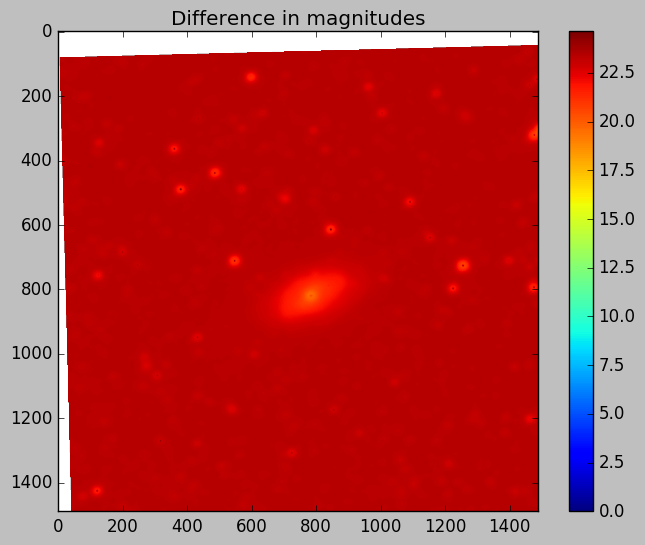

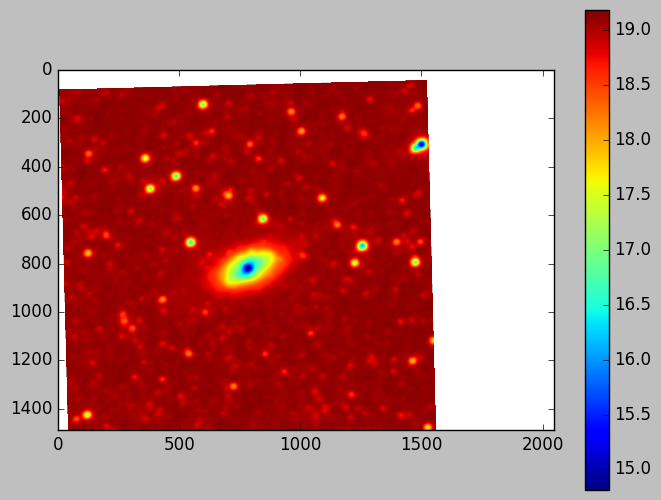

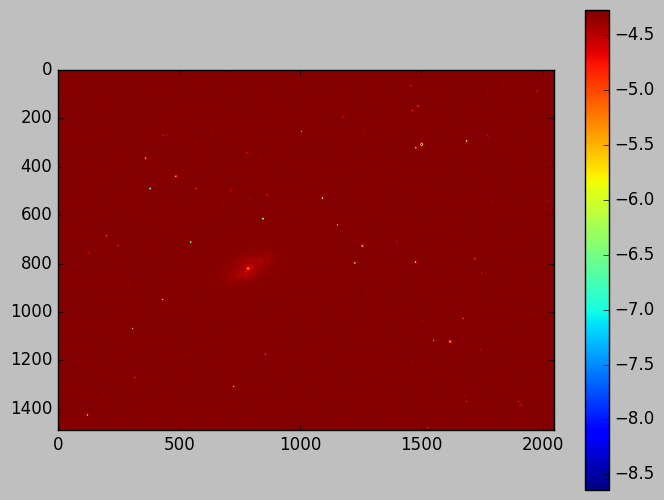

In [79]:
plt.figure(1)
plt.imshow(new_image_array_COMBINE)#, vmin=-4, vmax=-1)#, extent=[0, 2048, 0, 1489], aspect='auto', vmin=1
plt.title('Difference in magnitudes')
plt.colorbar()
plt.figure(2)
plt.imshow(reproj1)
plt.colorbar()
plt.figure(3)
plt.imshow(overlapping_image_SDSS_array[1])
plt.colorbar()

In [6]:
#cube = aplpy.make_rgb_cube([testarray1[0], testarray1[2], testarray1[1]], '/mnt/alt43-XDrive/Physics/Projects/MPhys Projects/2016-17/Gas Dust Galaxies/All Data/2MASS/OPRGB/%d%c%c_Gcube%d%c.fits' % (i, letter, fill, i, letter))
    #cube = aplpy.make_rgb_cube([testarray[0], testarray[1], testarray[2], testarray[3]], '/mnt/alt43-XDrive/Physics/Projects/MPhys Projects/2016-17/Gas Dust Galaxies/All Data/WISE/%d%cPic_cube%d%c.fits' % (i, letter, i, letter))
    #cube1 = '/mnt/alt43-XDrive/Physics/Projects/MPhys Projects/2016-17/Gas Dust Galaxies/All Data/2MASS/OPRGB/%d%c%c_Gcube%d%c.fits' % (i, letter, fill, i, letter)
    #print(cube2)
    #RGB_Image1 = aplpy.make_rgb_image(cube1,'/mnt/alt43-XDrive/Physics/Projects/MPhys Projects/2016-17/Gas Dust Galaxies/All Data/2MASS/OPRGB/%d%c%c_RGB.png' % (i, letter, fill), vmin_g=None, vmax_g=None, pmin_g=100, pmax_g=101)
    #F_rgb = aplpy.FITSFigure('/mnt/alt43-XDrive/Physics/Projects/MPhys Projects/2016-17/Gas Dust Galaxies/All Data/2MASS/OPRGB/%d%c%c_Gcube%d%c_2d.fits' % (i, letter, fill, i, letter))
    #F_rgb.show_rgb('/mnt/alt43-XDrive/Physics/Projects/MPhys Projects/2016-17/Gas Dust Galaxies/All Data/2MASS/OPRGB/%d%c%c_RGB.png' % (i, letter, fill))
    #F_rgb.save('/mnt/alt43-XDrive/Physics/Projects/MPhys Projects/2016-17/Gas Dust Galaxies/All Data/2MASS/OPRGB/%d%c%c_RGB.png' % (i, letter, fill))

In [147]:
#new_image_array_WISE = [ [0] * Length_Range_WISE[0] for p in range(Length_Range_WISE[0])]
#new_image_array_SDSS = [ [0] * Length_Range_SDSS[0] for p in range(Length_Range_SDSS[0])]
#new_image_array_COMBINE = [ [0] * Length_Range_SDSS[0] for p in range(Length_Range_SDSS[0])]

#print(new_image_array_WISE)#[0][0])
#print(newtestarraySDSS[1])
#data_access = fits.getdata(newtestarraySDSS[1])#
#print(data_access.shape)

In [130]:
#for y in range(1, Length_Range_WISE[0]):
#    for x in range(1, Length_Range_WISE[0]):
        #S_FluxTotal = np.sum(newtestarray2[0])
#        new_image_array_WISE[y-1][x-1] = 20.5 - (2.5*(np.log10(newtestarrayWISE[3][y-1][x-1])))#W1-10a
#at the moment newtestarray is used however overlapping_image_WISE_array[bands-1] could be used for the data
#the effects are the same, as reproj1 calls back to the points where the image is called upon (top boxes)

#The array or band has to be manually chosen.
#The above comments go for the SDSS and eventually 2MASS files works too



        #new_image_array_WISE[y-1][x-1] = 20.5 - (2.5*(np.log10(hdudataWISE[0][y-1][x-1])))

#new_image_array_WISE = np.array(new_image_array_WISE)

#print(new_image_array_WISE[201])  
#print(new_image_array_WISE1[201]) 

In [148]:
#for y in range(1, Length_Range_SDSS[0]):
#    for x in range(1, Length_Range_SDSS[0]):
        #S_FluxTotal = np.sum(newtestarray2[0])      
#        new_image_array_SDSS[y-1][x-1] = 25.11 - (2.5*(np.log10(newtestarraySDSS[1][y-1][x-1])))#SDSS-g
        #new_image_array3[y-1][x-1] = new_image_array2[y-1][x-1] - new_image_array1[y-1][x-1] 
        
#new_image_array_SDSS = np.array(new_image_array_SDSS)
#print new_image_array_SDSS[0][0]

In [141]:
#hduWISE = fits.PrimaryHDU(overlapping_image_WISE_array[3])#WISE
#hduSDSS = fits.PrimaryHDU(overlapping_image_SDSS_array[1])#SDSS
#hdulistWISE = fits.HDUList([hduWISE])
#hdulistSDSS = fits.HDUList([hduSDSS])
#hdulistWISE.writeto('NewFileWISE.fits', clobber=True)
#hdulistSDSS.writeto('NewFileSDSS.fits', clobber=True)
#Overlap_WISE = 'NewFileWISE.fits'
#Overlap_SDSS = 'NewFileSDSS.fits'
#If other bands are to be selected, file names may have to change

In [185]:
#hdu_list_overlapA = fits.open(Overlap_A)
#hdu_list_overlapB = fits.open(Overlap_B)
#image_overlap_dataWISE = fits.getdata(Overlap_WISE)
#image_overlap_dataSDSS = fits.getdata(Overlap_SDSS)
#shapeWISE = len(image_overlap_dataWISE)
#shapeSDSS = len(image_overlap_dataSDSS)
#new_WISE_header = get_pkg_data_filename('NewFileWISE.fits')
#new_SDSS_header = get_pkg_data_filename('NewFileSDSS.fits')
#hduWISE = fits.open(get_pkg_data_filename('NewFileWISE.fits'))[0]
#hduSDSS = fits.open(get_pkg_data_filename('NewFileSDSS.fits'))[0]
#wcsWISE = WCS(hduWISE.header)
#wcsSDSS = WCS(hduSDSS.header)

#parsing_header and wcsSDSS are manually chosen bands also

#print(footprint1)
#print( new_image_array2)
#print reproj1
#reproj1_array.shape
#image_overlap_dataSDSS = np.array(image_overlap_dataSDSS)
#print image_overlap_dataSDSS.shape

#print image_overlap_dataSDSS
#print '\n'
#print image_overlap_dataSDSS1


#reproj1 = np.array(reproj1)

#The for loops have a range of 230 which is not the correct length of the data in the FITS files' arrays.
#Not sure what sort of range to apply to these for loops
#This code is giving an error of array indices being out of range and the for loops may be the result?

In [16]:
###Vickys test starts here

In [31]:
new_image_array_WISE = [ [0] * Length_Range_WISE[0] for p in range(Length_Range_WISE[0])]
new_image_array_SDSS = [ [0] * Length_Range_SDSS[0] for p in range(Length_Range_SDSS[0])]
new_image_array_COMBINE = [ [0] * Length_Range_SDSS[0] for p in range(Length_Range_SDSS[0])]

In [120]:
def test_dim(testlist, dim=0):
### tests how many dimensions a list has
### copied from here: http://stackoverflow.com/questions/15985389/python-check-if-list-is-multidimensional-or-one-dimensional
   if isinstance(testlist, list):
      if testlist == []:
          return dim
      dim = dim + 1
      dim = test_dim(testlist[0], dim)
      return dim
   else:
      if dim == 0:
          return -1
      else:
          return dim

In [121]:
test_dim(new_image_array_WISE)

2

In [122]:
new_image_array_WISE = np.array(new_image_array_WISE)
new_image_array_WISE.shape

(302, 302)

In [123]:
new_image_array_SDSS = np.array(new_image_array_SDSS)
new_image_array_COMBINE = np.array(new_image_array_COMBINE)

In [124]:
#print(newtestarrayWISE[0])#[0][0])
#print(newtestarray1[1])
for y in range(1, Length_Range_WISE[0]):
    for x in range(1, Length_Range_WISE[0]):
        #S_FluxTotal = np.sum(newtestarray2[0])
        a=(2.5*(np.log10(newtestarrayWISE[0][y-1][x-1])))
        
        new_image_array_WISE[y-1][x-1] = round(20.50000000000000, 8) - round(a,8) #W1-10a

        new_image_array_WISE[y-1][x-1] = 20.5 - (2.5*(np.log10(hdudataWISE[0][y-1][x-1])))
        
print(new_image_array_WISE)        
print(a)        #print new_image_array_WISE[0]        
## This still works because the indexing is still the same even though the arrays have been converted. But they'll be easier to work with later on.

[[18 18 18 ..., 18 18  0]
 [18 18 18 ..., 18 18  0]
 [18 18 18 ..., 18 18  0]
 ..., 
 [18 18 18 ..., 18 18  0]
 [18 18 18 ..., 18 18  0]
 [ 0  0  0 ...,  0  0  0]]
1.61209255457


In [125]:
for y in range(1, Length_Range_SDSS[0]):
    for x in range(1, Length_Range_SDSS[0]):
        #S_FluxTotal = np.sum(newtestarray2[0])      
        new_image_array_SDSS[y-1][x-1] = 25.11 - (2.5*(np.log10(newtestarraySDSS[1][y-1][x-1])))#SDSS-g
        #new_image_array3[y-1][x-1] = new_image_array2[y-1][x-1] - new_image_array1[y-1][x-1]              

In [126]:
hduWISE = fits.PrimaryHDU(new_image_array_WISE)#WISE
hduSDSS = fits.PrimaryHDU(new_image_array_SDSS)#SDSS
hdulistWISE = fits.HDUList([hduWISE])
hdulistSDSS = fits.HDUList([hduSDSS])

In [127]:
hdulistWISE

In [128]:
hdulistWISE.writeto('NewFileWISE.fits', clobber=True)
hdulistSDSS.writeto('NewFileSDSS.fits', clobber=True)

[[ nan  nan  nan ...,  nan  nan  nan]
 [ nan  nan  nan ...,  nan  nan  nan]
 [ nan  nan  nan ...,  nan  nan  nan]
 ..., 
 [ nan  nan  nan ...,  nan  nan  nan]
 [ nan  nan  nan ...,  nan  nan  nan]
 [ nan  nan  nan ...,  nan  nan  nan]]


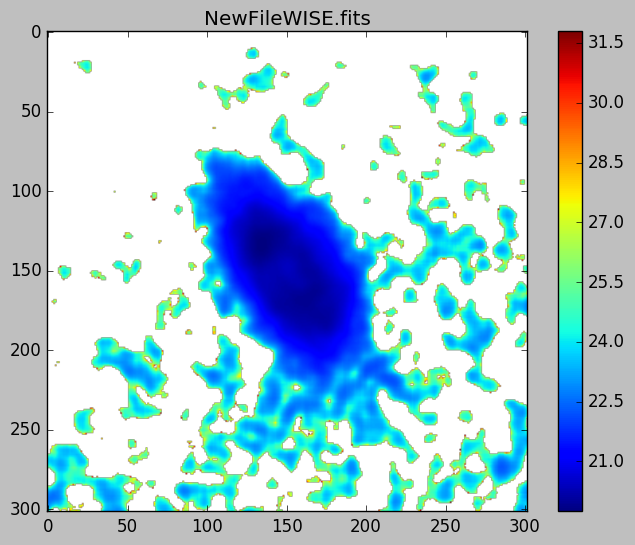

In [126]:
plt.figure(1)
plt.imshow(overlapping_image_WISE_array[3])
plt.title('NewFileWISE.fits')
plt.colorbar()
hdulistWISE[0].header

print overlapping_image_WISE_array[0]

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1489                                                  
NAXIS2  =                 1489                                                  
EXTEND  =                    T                                                  

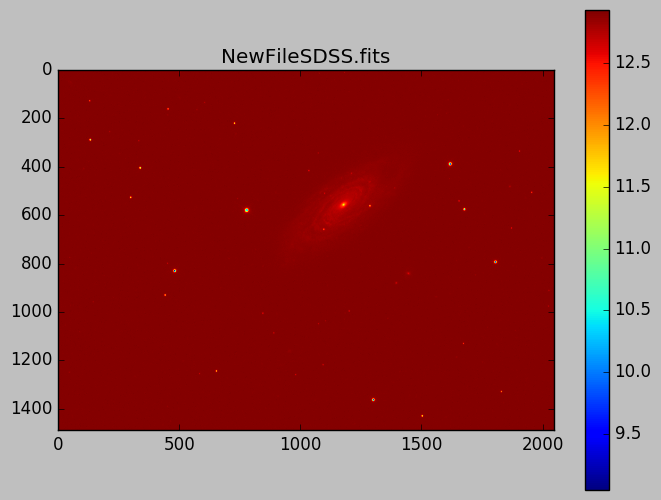

In [125]:


plt.figure(1)
plt.imshow(overlapping_image_SDSS_array[1])
plt.title('NewFileSDSS.fits')
plt.colorbar()
hdulistSDSS[0].header



In [29]:
Overlap_WISE = 'NewFileWISE.fits'
Overlap_SDSS = 'NewFileSDSS.fits'

#hdu_list_overlapA = fits.open(Overlap_A)
#hdu_list_overlapB = fits.open(Overlap_B)
image_overlap_dataWISE = fits.getdata(Overlap_WISE)
image_overlap_dataSDSS = fits.getdata(Overlap_SDSS)
shapeWISE = len(image_overlap_dataWISE)
shapeSDSS = len(image_overlap_dataSDSS)

In [30]:
image_overlap_dataWISE = np.array(image_overlap_dataWISE)
shapeWISE = image_overlap_dataWISE.shape
shapeWISE

(302, 302)

In [31]:
image_overlap_dataSDSS = np.array(image_overlap_dataSDSS)
shapeSDSS = image_overlap_dataSDSS.shape
shapeSDSS

(1489, 1489)

In [32]:
hduWISE = fits.open(get_pkg_data_filename('NewFileWISE.fits'))[0]
hduSDSS = fits.open(get_pkg_data_filename('NewFileSDSS.fits'))[0]
wcsWISE = WCS(hduWISE.header)
wcsSDSS = WCS(hduSDSS.header)

In [33]:
print 'wcsWISE'
print wcsWISE
print '\n'
print 'wcsSDSS'
print wcsSDSS

wcsWISE
WCS Keywords

Number of WCS axes: 2
CTYPE : ''  ''  
CRVAL : 0.0  0.0  
CRPIX : 0.0  0.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : 1.0  1.0  
NAXIS    : 302 302


wcsSDSS
WCS Keywords

Number of WCS axes: 2
CTYPE : ''  ''  
CRVAL : 0.0  0.0  
CRPIX : 0.0  0.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : 1.0  1.0  
NAXIS    : 1489 1489


In [34]:
reproj1, footprint1 = reproject_interp(parsing_headerWISE[0], wcsSDSS1[0], shape_out=[Length_Range_SDSS[0],Length_Range_SDSS[0]])
#reproj2 = reproject_interp(hduB, wcs1, shape_out=len(image_overlap_dataB))
#print(footprint1)
#print( new_image_array2)
#for y in range(1, 230):
#    for x in range(1, 230):
#        if footprint1[y-1][x-1] == 0:
#            break
#        else:
#            new_image_array_COMBINE[y-1][x-1] = reproj1[y-1][x-1] - image_overlap_dataSDSS[y-1][x-1]
        
        #new_image_array3[y-1][x-1] = reproj1[y-1][x-1] - reproj2[y-1][x-1]
        #image_overlap_dataA[y-1][x-1] - image_overlap_dataB[y-1][x-1]
print(reproj1)
print(new_image_array_WISE[0][0])
print(new_image_array_SDSS[0][0])
print(new_image_array_COMBINE[0][0])  

new_image_array_COMBINE = reproj1 - overlapping_image_SDSS[0]



plt.figure(1)
plt.imshow(reproj1)
plt.colorbar()

[[ nan  nan  nan ...,  nan  nan  nan]
 [ nan  nan  nan ...,  nan  nan  nan]
 [ nan  nan  nan ...,  nan  nan  nan]
 ..., 
 [ nan  nan  nan ...,  nan  nan  nan]
 [ nan  nan  nan ...,  nan  nan  nan]
 [ nan  nan  nan ...,  nan  nan  nan]]
18
17
0


ValueError: operands could not be broadcast together with shapes (1489,1489) (1489,2048) 

In [35]:
'''
So now this plot makes a lot more sense! Because both of your new images - 
NewFileWISE.fits and NewFileSDSS.fits - 
are missing all the WCS information from the header, 
the reproj code sets all the parameters to the default values. 
This means it thinks there isn't any reprojecting to do because the images are already in the same system.

Suggestions for next steps

There's a key point early on in your code that results in the images not having WCS information in the header. 
If you solve that issue, your code will work. 
I'm not going to tell you exactly what to do because you can absolutely get it yourself, 
    we just need to simplify the code a little bit (and that's a good thing).

Try to break up your code into steps, like I have here, 
    to find where the problem is and see if you could simplify what's going on at that stage. 
What are you doing to the images there? 
It's easier to get one thing working then to add a step than to try to add all the things at once.

Check what's actually in your variables, arrays, images, headers, etc at each stage too. 
Again, this is easier if you break it up into chunks. It's totally OK to have one line of code in a cell. 
Here's an example of some (what I thought initially would be simple) code that took me a looooong time to debug:
https://github.com/vickyscowcroft/ipython_notebooks/blob/master/simple_rrlyrae_lightcurves.ipynb 
If you look at the first 12 cells, I keep printing the same table and the length of the arrays out. 
That was because I was trying to match some tables using the name of the stars, 
   but the capital letters were messing everything up. 
It took literally days to fix, but the only way I could see what was going on was looking at what 
   was in the tables to see if they were what I thought they should be.

Comment your code! It will be really helpful to you later on if you write now what you think it should do, 
   what it actually does, and why you think it might not be doing what you think. 
Even something you think is super obvious now will not be in a weeks time. LEARN FROM MY MISFORTUNE.
'''

"\nSo now this plot makes a lot more sense! Because both of your new images - \nNewFileWISE.fits and NewFileSDSS.fits - \nare missing all the WCS information from the header, \nthe reproj code sets all the parameters to the default values. \nThis means it thinks there isn't any reprojecting to do because the images are already in the same system.\n\nSuggestions for next steps\n\nThere's a key point early on in your code that results in the images not having WCS information in the header. \nIf you solve that issue, your code will work. \nI'm not going to tell you exactly what to do because you can absolutely get it yourself, \n    we just need to simplify the code a little bit (and that's a good thing).\n\nTry to break up your code into steps, like I have here, \n    to find where the problem is and see if you could simplify what's going on at that stage. \nWhat are you doing to the images there? \nIt's easier to get one thing working then to add a step than to try to add all the things